k=1: Average Accuracy = 0.9725
k=2: Average Accuracy = 0.9451
k=3: Average Accuracy = 0.9647
k=4: Average Accuracy = 0.9529
k=5: Average Accuracy = 0.9686
k=6: Average Accuracy = 0.9647
k=7: Average Accuracy = 0.9569
k=8: Average Accuracy = 0.9765
k=9: Average Accuracy = 0.9647
k=10: Average Accuracy = 0.9647
k=11: Average Accuracy = 0.9843
k=12: Average Accuracy = 0.9647
k=13: Average Accuracy = 0.9765
k=14: Average Accuracy = 0.9490
k=15: Average Accuracy = 0.9490
k=16: Average Accuracy = 0.9216
k=17: Average Accuracy = 0.9490
k=18: Average Accuracy = 0.9490
k=19: Average Accuracy = 0.9373
k=20: Average Accuracy = 0.9451


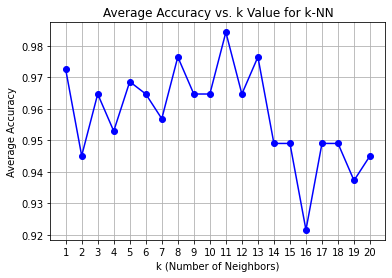

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset with column names
url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, header=None, names=column_names)

# Extract features and labels
X = df.iloc[:, :-1].values  # All columns except the last
y = df['class'].values      # Class column

# Initialize k values and an empty list to store average accuracies
k_values = list(range(1, 21))
avg_accuracies = []

# Function to perform k-NN and calculate average accuracy over multiple runs
def cross_validate_knn(k, X, y, num_runs=5):
    accuracies = []
    for _ in range(num_runs):
        # Shuffle indices and split data into training and test sets (66%/34%)
        indices = np.random.permutation(len(X))
        train_size = int(0.66 * len(X))
        X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
        y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]
        
        # Train and evaluate the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        # Calculate accuracy and store it
        accuracies.append(np.mean(y_pred == y_test))
    
    # Return average accuracy for the current k
    return np.mean(accuracies)

# Calculate average accuracy for each k and store the results
for k in k_values:
    avg_accuracy = cross_validate_knn(k, X, y)
    avg_accuracies.append(avg_accuracy)
    print(f'k={k}: Average Accuracy = {avg_accuracy:.4f}')

# Plotting the results
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b')
plt.title('Average Accuracy vs. k Value for k-NN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
